# Data Wrangling - Players Clustering

In [69]:
#dependências do projeto

%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [30]:
df = pd.read_csv('players_info_cleaned.csv', sep=',')


#mostrar todas as colunas quando printar o dataframe
pd.options.display.max_columns = None

In [31]:
df.shape

(186, 169)

In [32]:
df['match_time'] = df['match_time.1']

## Clusterização

In [36]:
def getKValue(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(df)
        distortions.append(km.inertia_)

    # plot
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [42]:
#K means Clustering 
def doKmeans(df, nclust):
    model = KMeans(nclust)
    model.fit(df)
    clust_labels = model.predict(df)
    cent = model.cluster_centers_
    return (clust_labels, cent)

### Level do Torneio

In [89]:
df_level = df[['atp_250','atp_500','davis_cup','grand_slam','tour_finals','masters','olympics']]


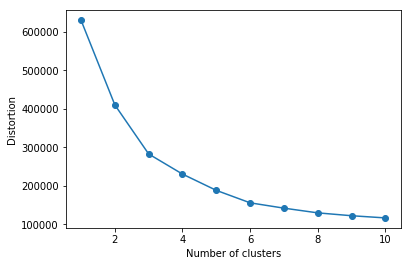

In [90]:
getKValue(df_level)

In [91]:
df_level['labels'], cents = doKmeans(df_level, 3)
df['cluster_level'] = df_level['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


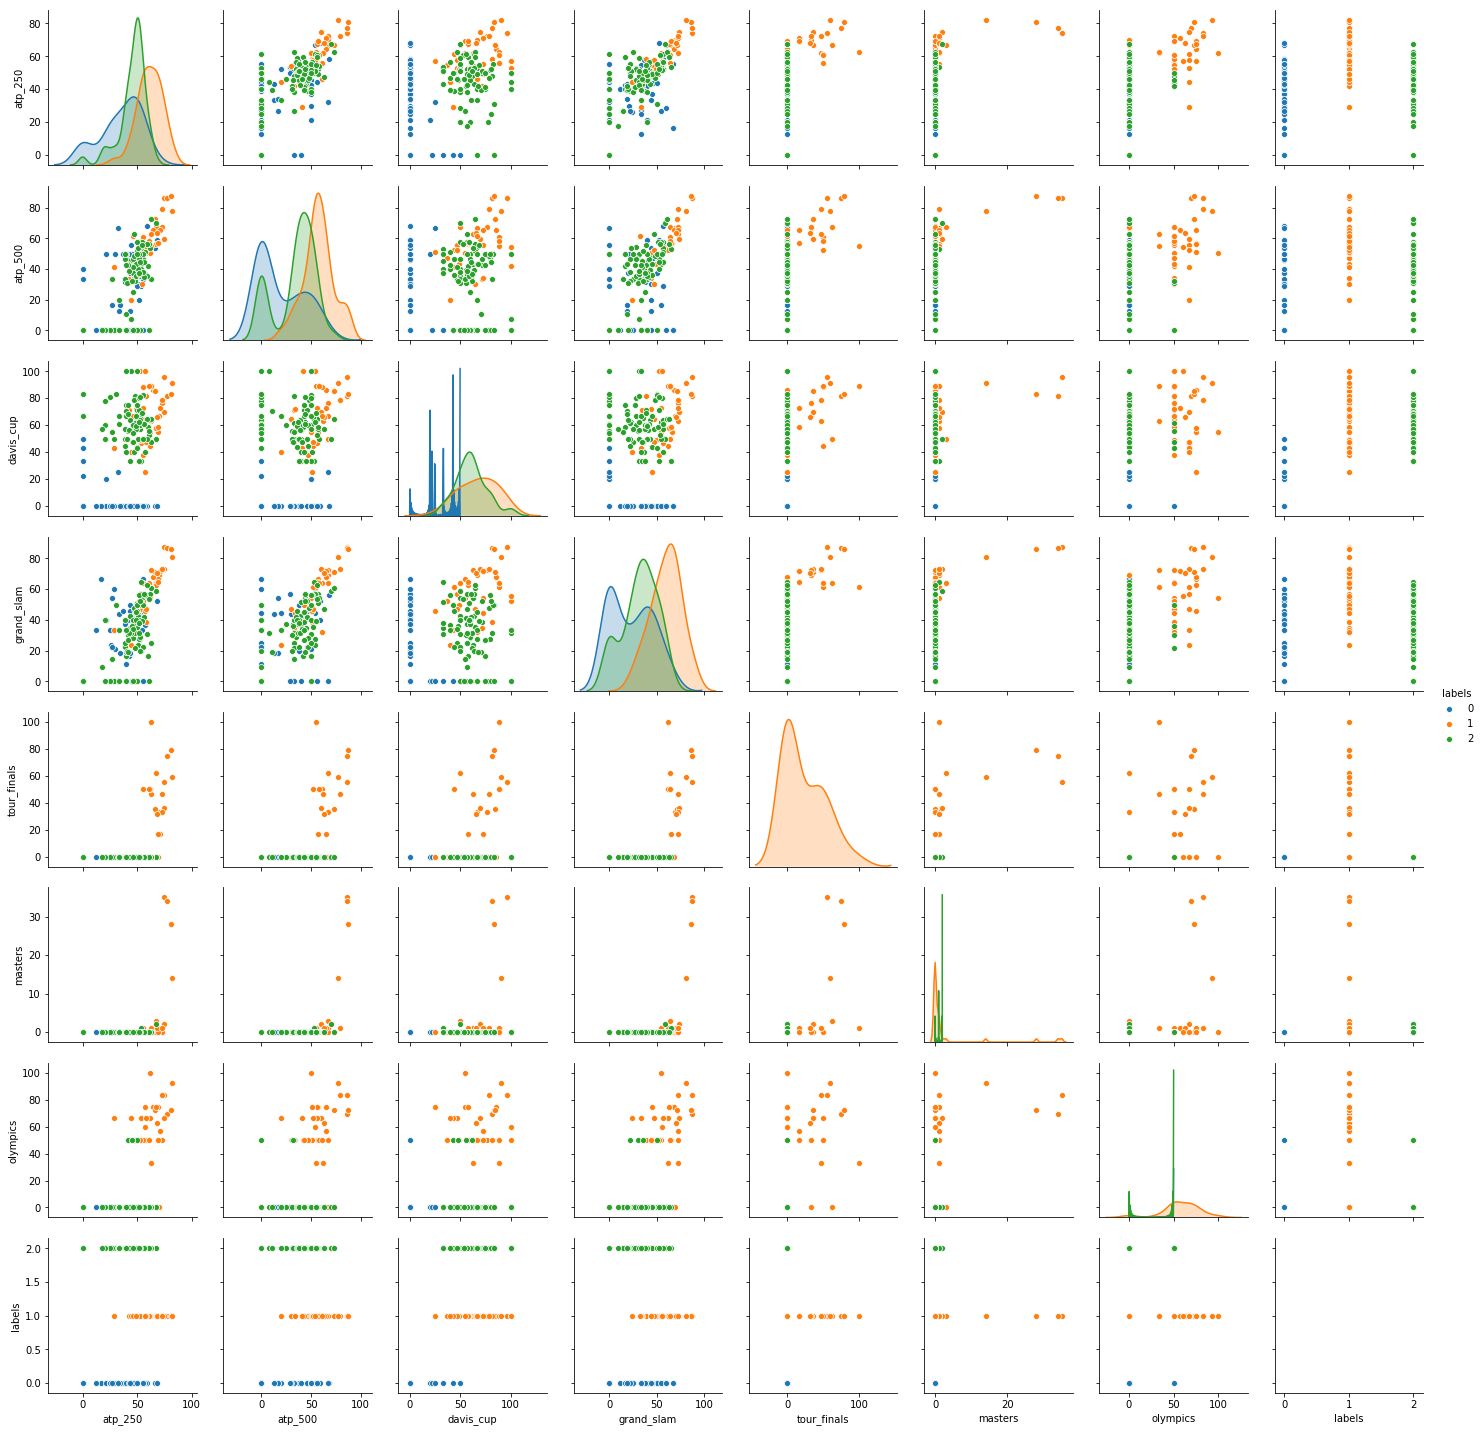

In [93]:
# Create the default pairplot
sns.pairplot(df_level, hue='labels')

### Tipo de Piso

In [99]:
df_piso = df[['hard','clay','grass']]

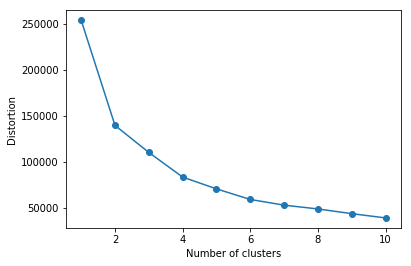

In [100]:
getKValue(df_piso)

In [116]:
df_piso['labels'], cents = doKmeans(df_piso, 4)
df['cluster_piso'] = df_piso['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


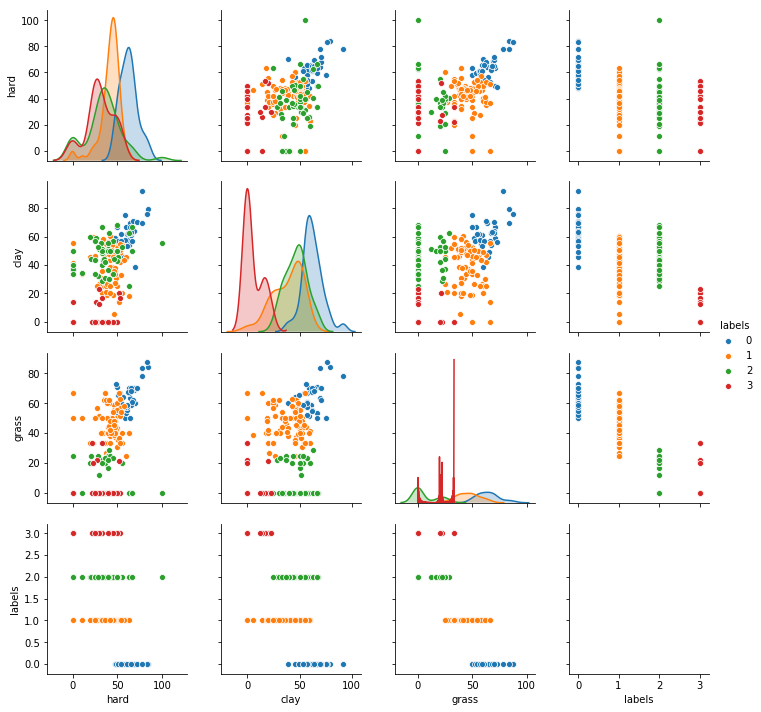

In [102]:
# Create the default pairplot
sns.pairplot(df_piso, hue='labels')

### Situação de Pressão

In [104]:
df_pressao = df[['deciding_set','fifth_set','after_losing_1st_set','after_winning_1st_set','deciding_set_tie_breaks','tie_breaks']]


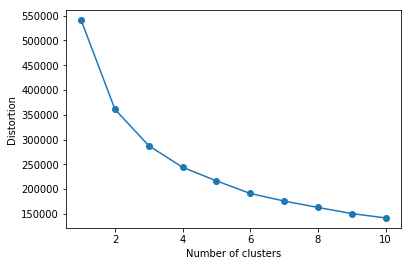

In [105]:
getKValue(df_pressao)

In [117]:
df_pressao['labels'], cents = doKmeans(df_pressao, 3)
df['cluster_pressao'] = df_pressao['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


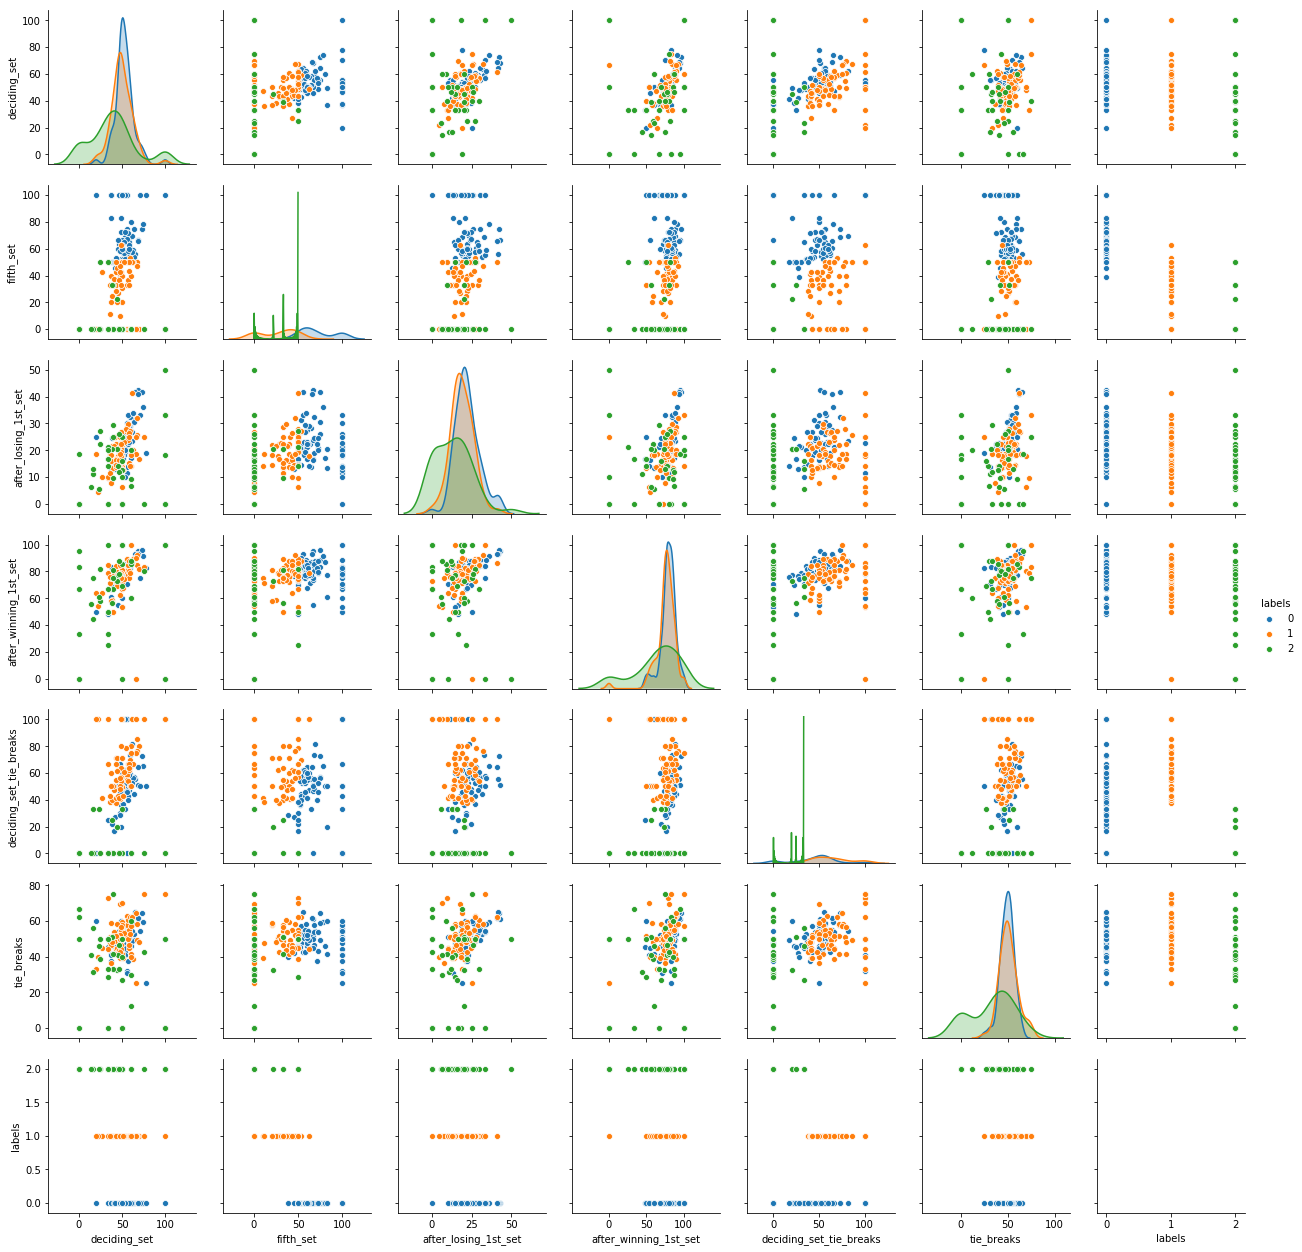

In [107]:
# Create the default pairplot
sns.pairplot(df_pressao, hue='labels')

### Saque

In [120]:
df_saque = df[['ace_%','aces_per_svc._game', 'aces_per_set', 'aces_per_match','aces_/_dfs_ratio']]

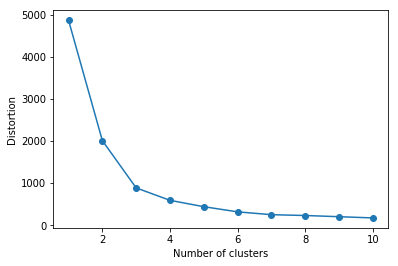

In [121]:
getKValue(df_saque)

In [122]:
df_saque['labels'], cents = doKmeans(df_saque, 3)
df['cluster_saque'] = df_saque['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


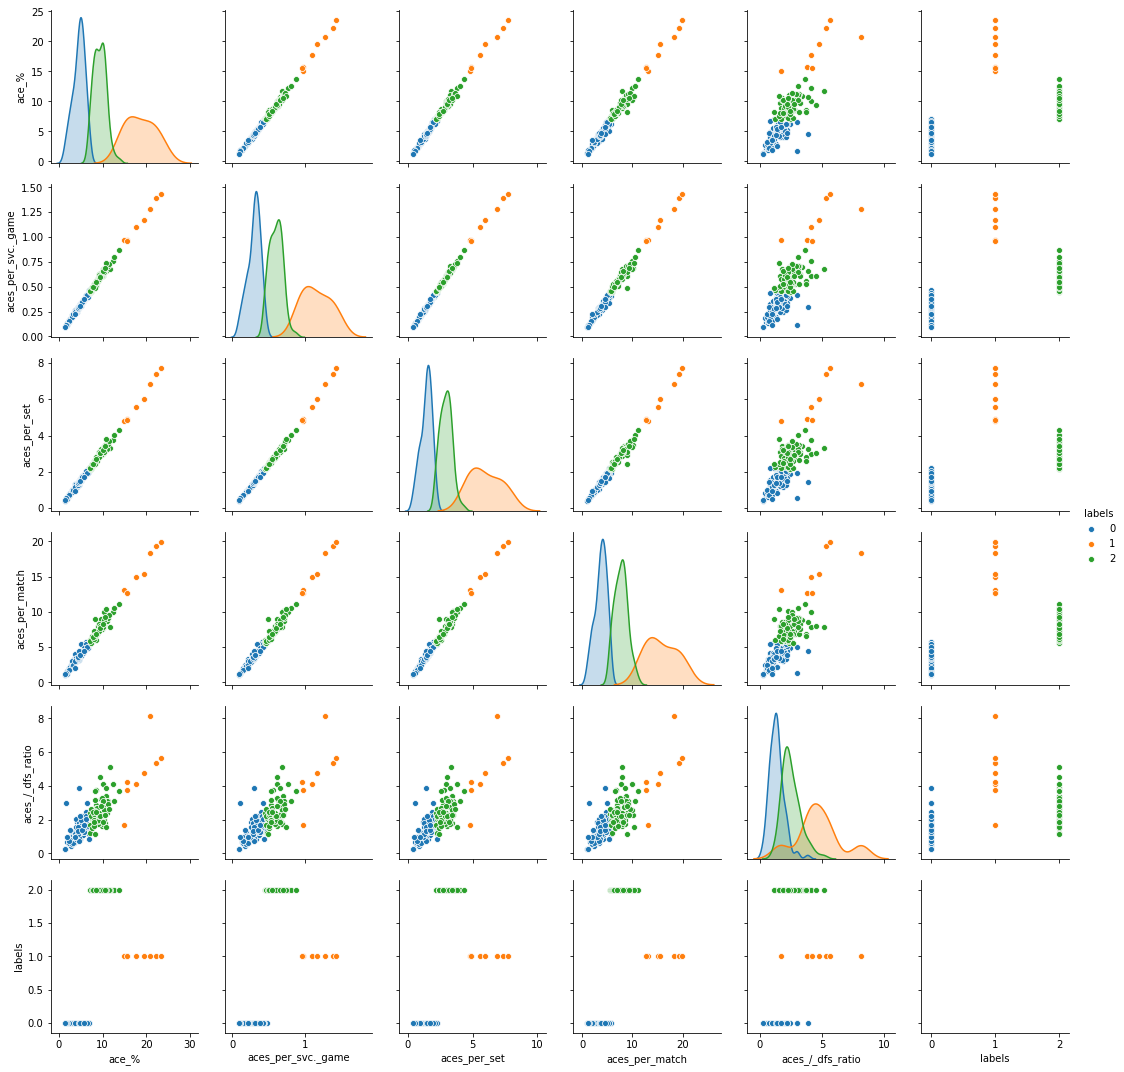

In [123]:
# Create the default pairplot
sns.pairplot(df_saque, hue='labels')

In [127]:
df[df['player_name'] == "Thiago Monteiro"].head() 

,player_id,player_name,age,country,favorite_hand,backhand,turned_pro,prize_money,titles,grand_slams,masters,finals,current_rank,best_rank,hard,clay,grass,grand_slam,tour_finals,masters.1,olympics,atp_500,atp_250,davis_cup,deciding_set,fifth_set,after_winning_1st_set,after_losing_1st_set,tie_breaks,deciding_set_tie_breaks,outdoor,indoor,best_of_3,best_of_5,vs_no._1,vs_top_5,vs_top_10,vs_top_20,vs_top_50,vs_top_100,final,for_bronze_medal,semi_final,quarter_final,round_of_16,round_of_32,round_of_64,round_of_128,very_fast,fast,medium_fast,medium,medium_slow,slow,very_slow,win,final.1,semi_final.1,quarter_final.1,round_of_16.1,round_of_32.1,round_of_64.1,round_of_128.1,ace_%,double_fault_%,1st_serve_%,1st_serve_won_%,2nd_serve_won_%,break_points_saved_%,service_points_won_%,service_games_won_%,ace_against_%,double_fault_against_%,1st_srv._return_won_%,2nd_srv._return_won_%,break_points_won_%,return_points_won_%,return_games_won_%,points_dominance,games_dominance,break_points_ratio,total_points_won_%,games_won_%,sets_won_%,matches_won_%,match_time,ace_%.1,aces_per_svc._game,aces_per_set,aces_per_match,double_fault_%.1,dfs_per_2nd_serve_%,dfs_per_svc._game,dfs_per_set,dfs_per_match,aces_/_dfs_ratio,ace_against_%.1,double_fault_against_%.1,1st_serve_%.1,1st_serve_won_%.1,2nd_serve_won_%.1,1st_serve_effectiveness,serve_rating,service_points_won_%.1,svc._in_play_pts._won_%,points_per_service_game,pts._lost_per_svc._game,break_points_saved_%.1,bps_per_svc._game,bps_faced_per_set,bps_faced_per_match,service_games_won_%.1,svc._gms._lost_per_set,svc._gms._lost_per_match,1st_srv._return_won_%.1,2nd_srv._return_won_%.1,return_rating,return_points_won_%.1,rtn._in_play_pts._won_%,points_per_return_game,pts._won_per_rtn._game,break_points_won_%.1,bps_per_return_game,bps_per_set,bps_per_match,return_games_won_%.1,rtn._gms._won_per_set,rtn._gms._won_per_match,total_points_won_%.1,tot._2nd_srv._in_pl._pts._w._%,rtn._to_svc._points_ratio,points_per_game,points_per_set,points_per_match,games_won_%.1,games_per_set,games_per_match,tie_breaks_won_%,tie_breaks_per_set_%,tie_breaks_per_match,sets_won_%.1,sets_per_match,matches_won_%.1,points_dominance.1,in_play_points_dominance,2nd_srv._in_play_pts._dom.,games_dominance.1,break_points_ratio.1,pts._to_matches_over_perf.,pts._to_sets_over_perf.,pts._to_gms._over_perf.,s._pts._to_s._gms._ov._perf.,r._pts._to_r._gms._ov._perf.,pts._to_tbs._over_perf.,gms._to_matches_ov._perf.,gms._to_sets_over_perf.,sets_to_matches_ov._perf.,bps_over_performing,bps_saved_over_perf.,bps_conv._over_perf.,opponent_rank,opponent_elo_rating,upsets_scored_%,upsets_against_%,upsets_%,point_time,game_time,set_time,match_time.1,cluster_level,cluster_piso,cluster_pressao,cluster_saque
86,6315,Thiago Monteiro,25,Brazil,Left-handed,Two-handed,2011,1130183,0,0,0,0,88,74,20.0,45.5,33.3,22.2,0.0,0.0,0.0,46.7,39.1,44.4,38.9,33.3,56.4,20.5,51.2,25.0,38.3,0.0,40.0,23.1,0.0,0.0,50.0,14.3,24.2,30.9,0.0,0.0,0.0,16.7,35.3,50.0,16.7,20.0,25.0,44.4,26.3,38.9,40.0,50.0,50.0,0.0,0.0,0.0,16.7,35.3,50.0,16.7,20.0,5.5,3.1,64.0,69.8,50.3,59.4,62.8,76.9,8.5,3.8,24.9,46.9,40.0,33.8,17.6,0.91,0.76,0.99,48.6,47.3,40.9,37.3,113,5.5,0.35,1.7,4.5,3.1,8.6,0.2,0.96,2.6,1.76,8.5,3.8,64.0,69.8,50.3,1.39,323,62.8,62.7,6.38,2.38,59.4,0.57,2.77,7.3,76.9,1.12,3.0,24.9,46.9,129,33.8,34.2,6.12,2.07,40.0,0.44,2.14,5.7,17.6,0.85,2.3,48.6,48.0,0.96,6.24,60.8,161.1,47.3,9.74,25.8,51.2,18.6,0.49,40.9,2.65,37.3,0.91,0.92,0.92,0.76,0.99,0.77,0.84,0.97,1.23,0.52,1.05,0.79,0.87,0.91,1.05,0.95,1.18,72,1859,21.7,16.9,38.6,0.705,4.4,42.9,113,2,0,1,0


### Dupla Falta


In [129]:
df_duplafalta = df[['double_fault_%','dfs_per_2nd_serve_%','dfs_per_match','dfs_per_set','dfs_per_svc._game']]


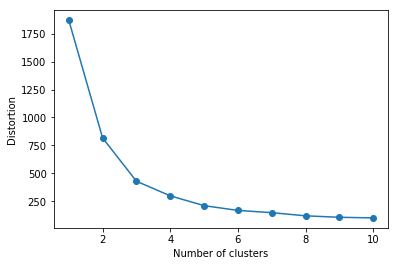

In [130]:
getKValue(df_duplafalta)

In [131]:
df_duplafalta['labels'], cents = doKmeans(df_duplafalta, 3)
df['cluster_duplafalta'] = df_duplafalta['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


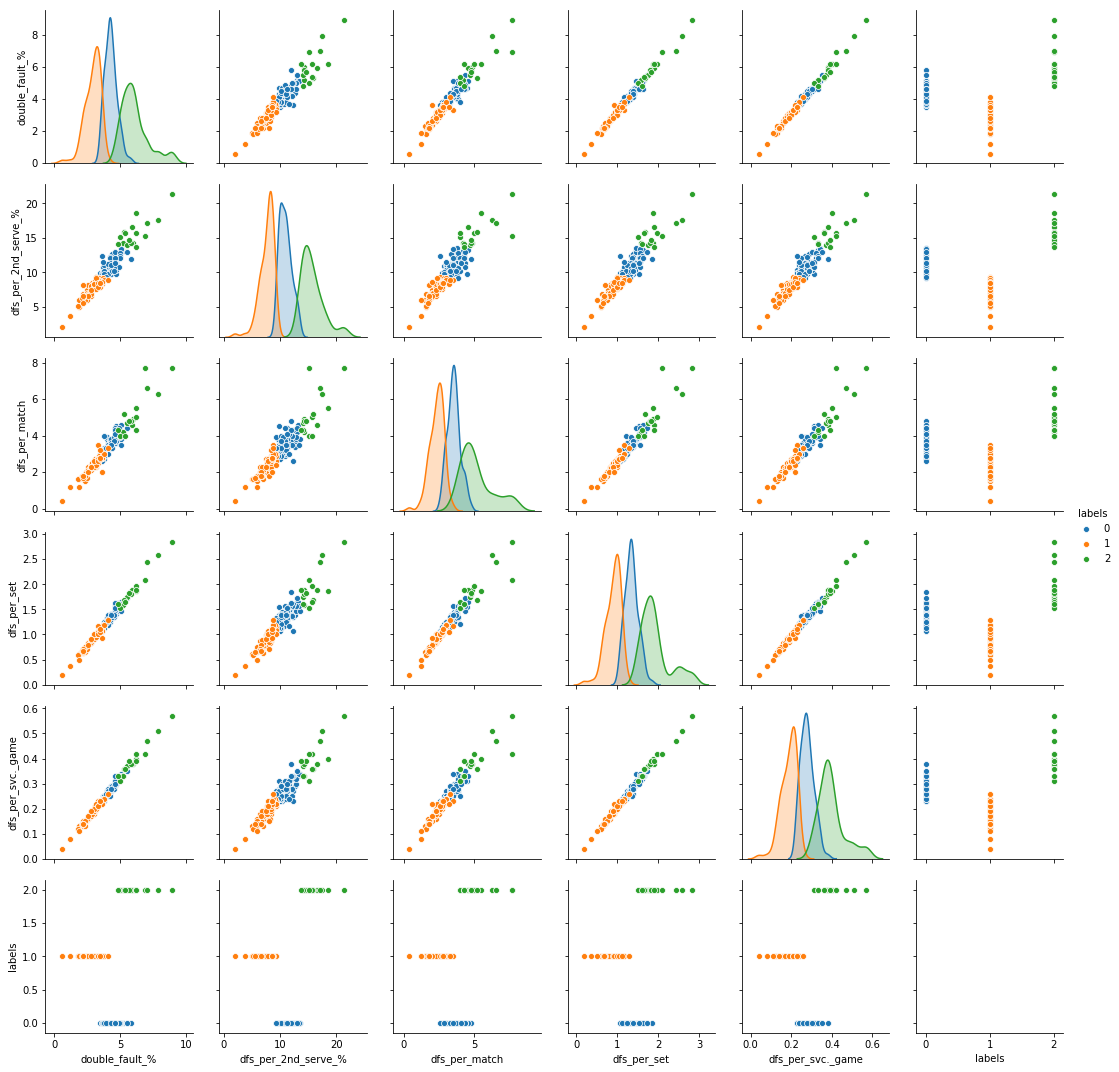

In [132]:
# Create the default pairplot
sns.pairplot(df_duplafalta, hue='labels')

### Game de Serviço

In [136]:
df_servico = df[['1st_serve_%','1st_serve_won_%','2nd_serve_won_%','service_points_won_%','points_per_service_game','pts._lost_per_svc._game',
                    'service_games_won_%','svc._gms._lost_per_match','svc._gms._lost_per_set']]


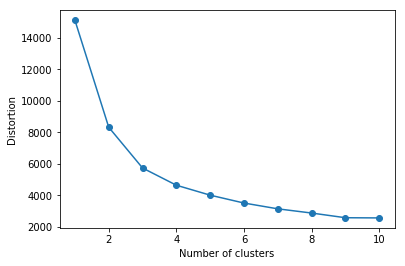

In [137]:
getKValue(df_servico)

In [138]:
df_servico['labels'], cents = doKmeans(df_servico, 3)
df['cluster_servico'] = df_servico['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Create the default pairplot
sns.pairplot(df_servico, hue='labels')

### Game de Retorno

In [143]:
df_gameretorno= df[['1st_srv._return_won_%','2nd_srv._return_won_%','points_per_return_game','pts._won_per_rtn._game','return_games_won_%',
                    'return_points_won_%','rtn._gms._won_per_match','rtn._gms._won_per_set','ace_against_%','double_fault_against_%']]


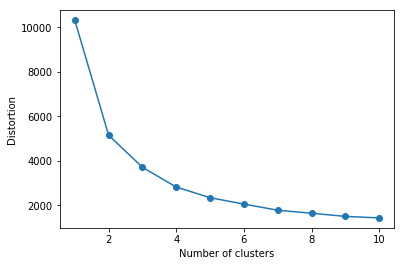

In [144]:
getKValue(df_gameretorno)

In [145]:
df_gameretorno['labels'], cents = doKmeans(df_gameretorno, 3)
df['cluster_retorno'] = df_gameretorno['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


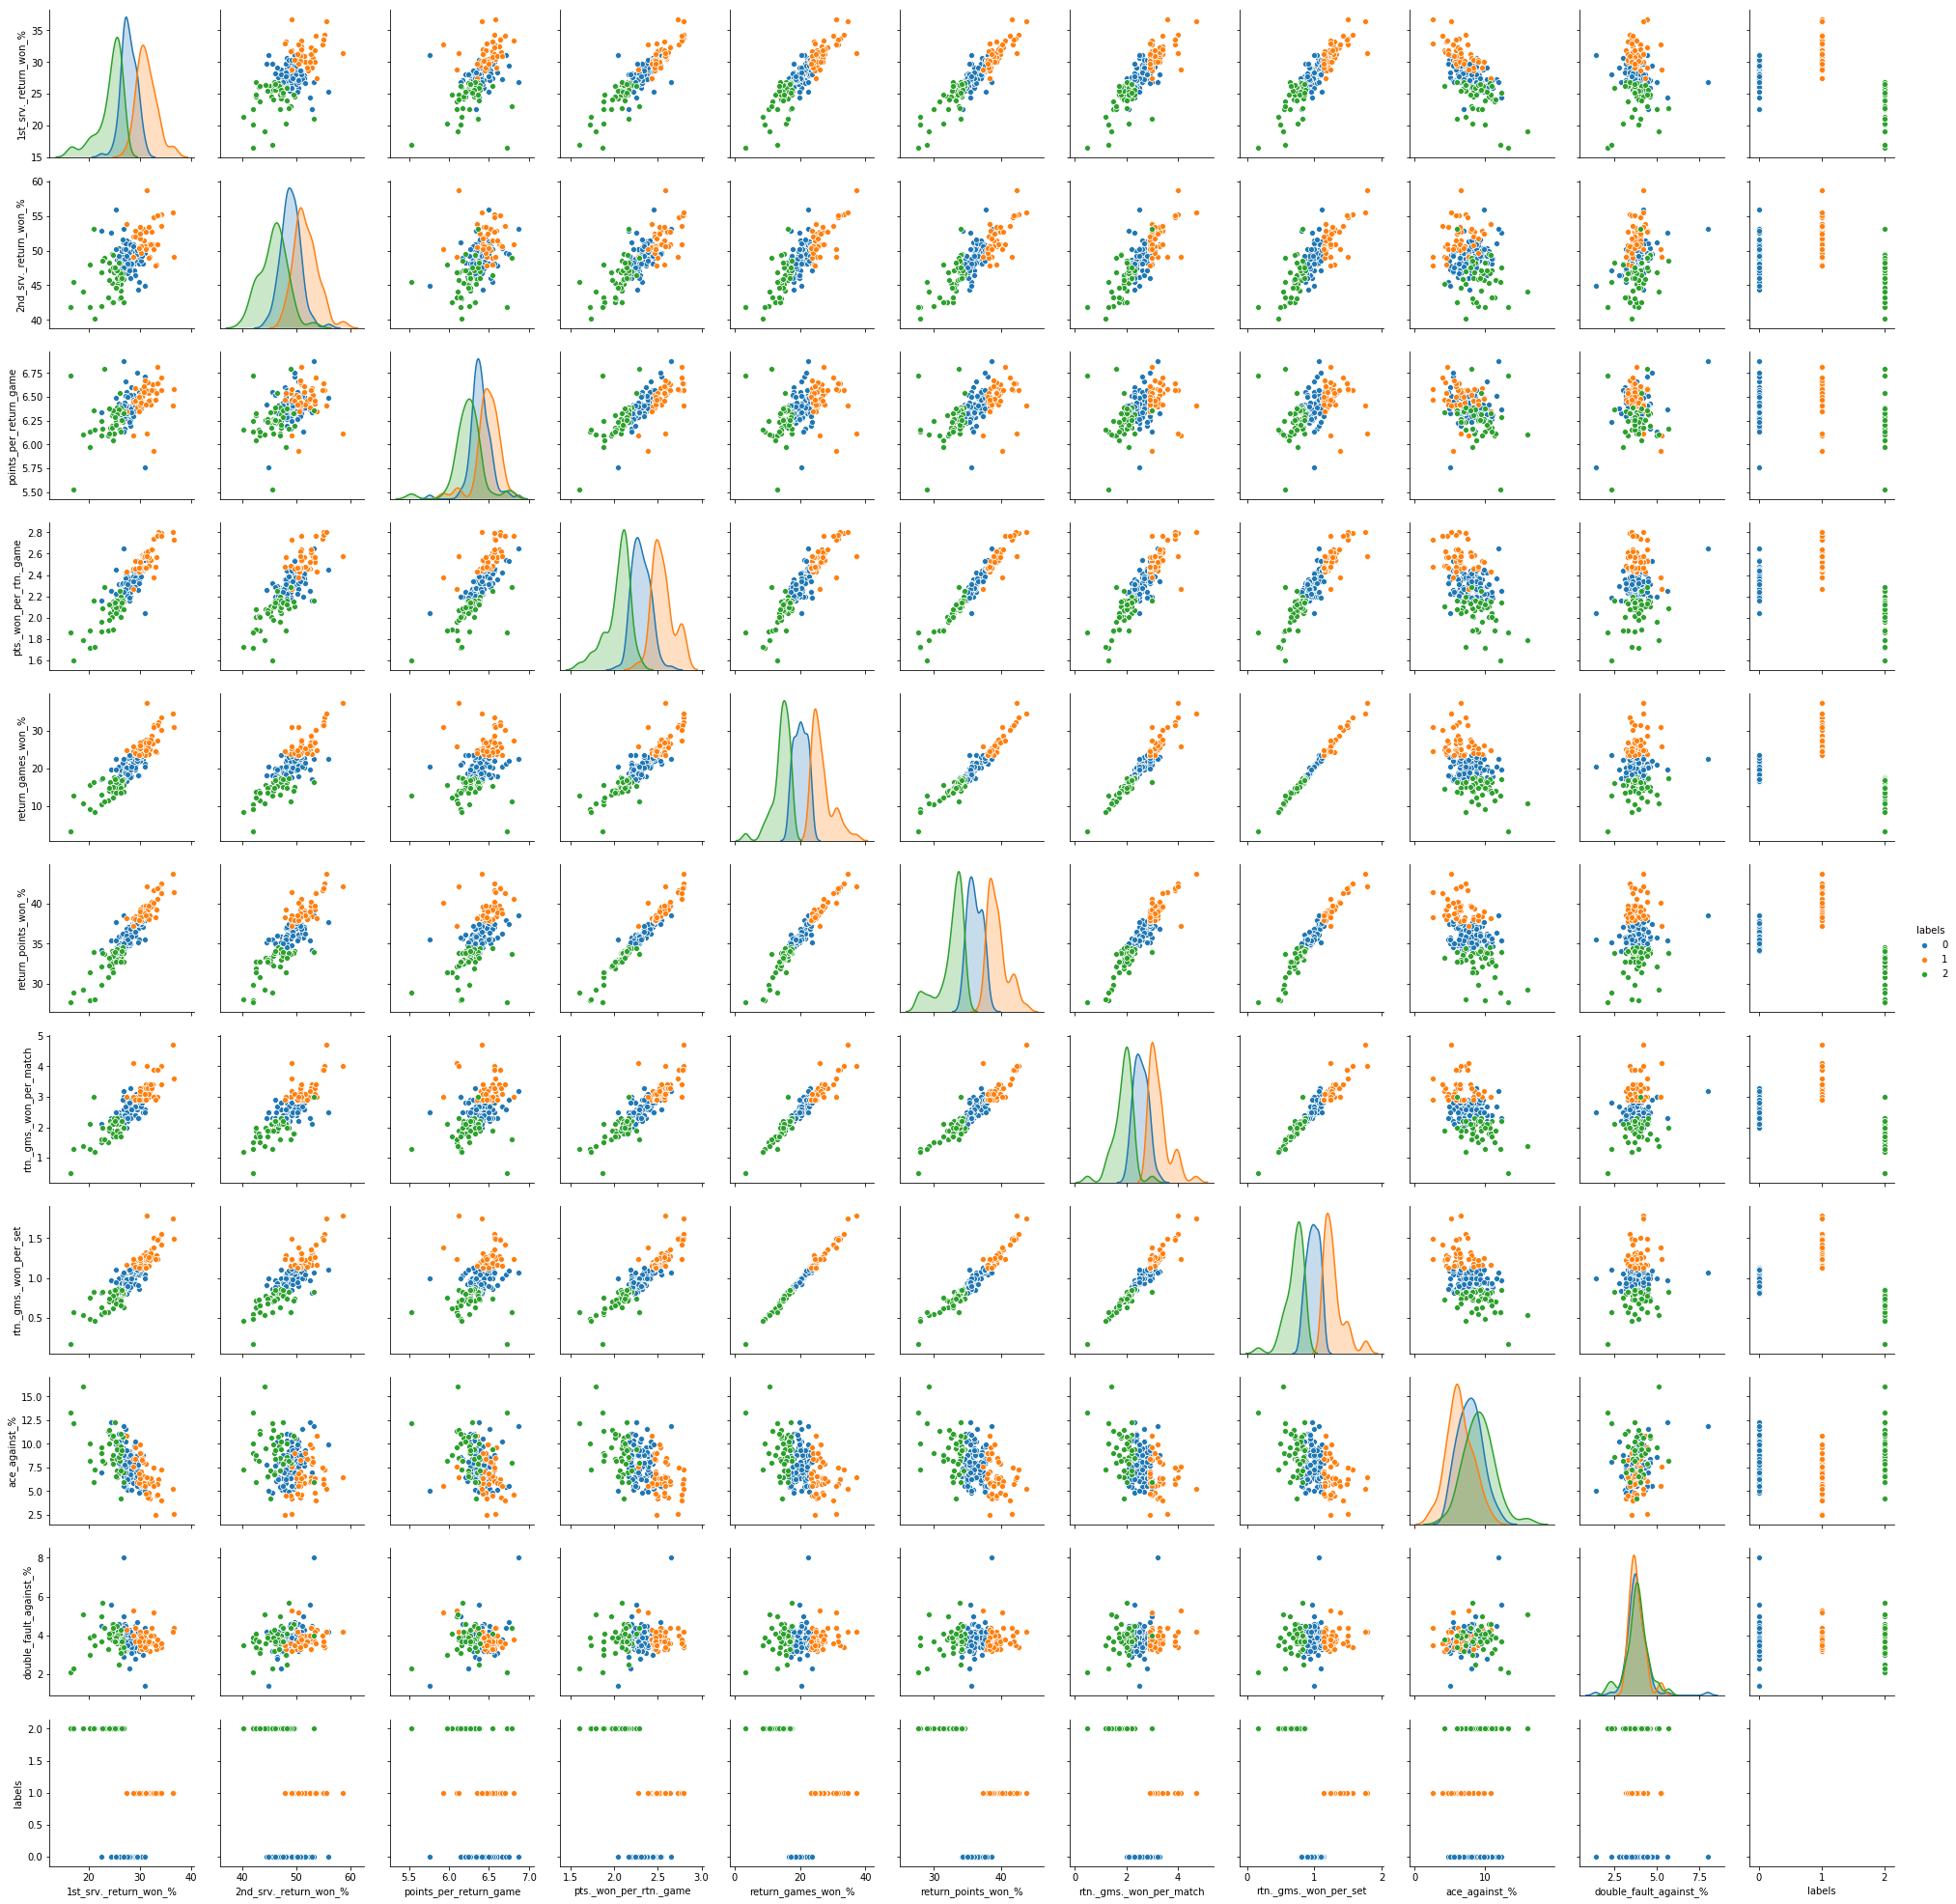

In [146]:
# Create the default pairplot
sns.pairplot(df_gameretorno, hue='labels')

### Break Points Contra

In [147]:
df_bp_contra = df[['bps_faced_per_match','bps_faced_per_set','bps_per_svc._game','break_points_saved_%']]

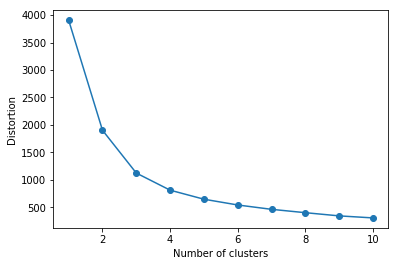

In [148]:
getKValue(df_bp_contra)

In [149]:
df_bp_contra['labels'], cents = doKmeans(df_bp_contra, 3)
df['cluster_bpcontra'] = df_bp_contra['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


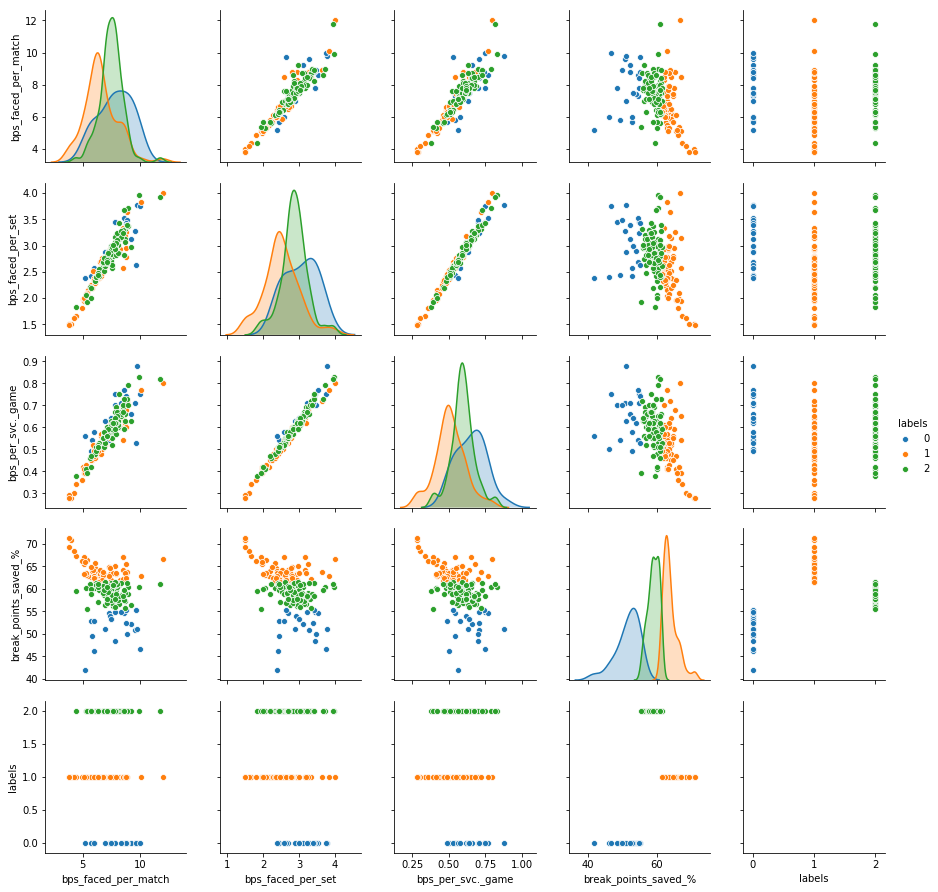

In [150]:
# Create the default pairplot
sns.pairplot(df_bp_contra, hue='labels')

### Break Points a Favor

In [153]:
df_bp_favor = df[['bps_per_match','bps_per_return_game','bps_per_set','break_points_won_%']]


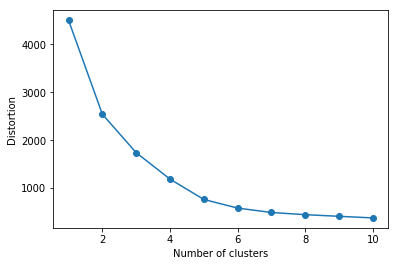

In [154]:
getKValue(df_bp_favor)

In [158]:
df_bp_favor['labels'], cents = doKmeans(df_bp_favor, 3)
df['cluster_bpfavor'] = df_bp_favor['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


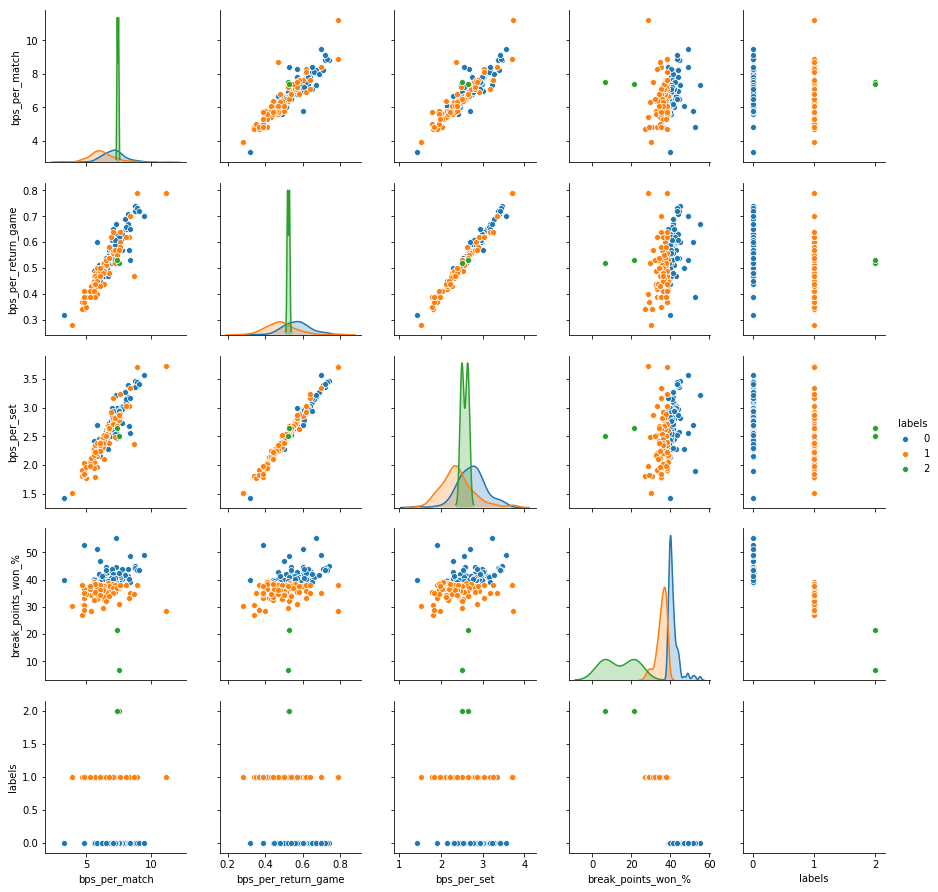

In [159]:
# Create the default pairplot
sns.pairplot(df_bp_favor, hue='labels')

### Pontos

In [161]:
df_pontos = df[['points_per_game','points_per_match','points_per_set','rtn._to_svc._points_ratio','total_points_won_%','point_time']]

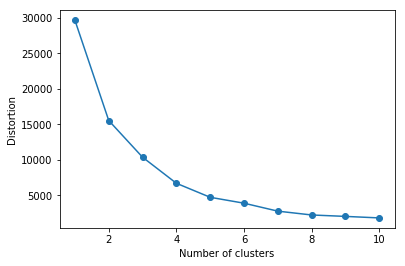

In [162]:
getKValue(df_pontos)

In [165]:
df_pontos['labels'], cents = doKmeans(df_pontos, 4)
df['cluster_pontos'] = df_pontos['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


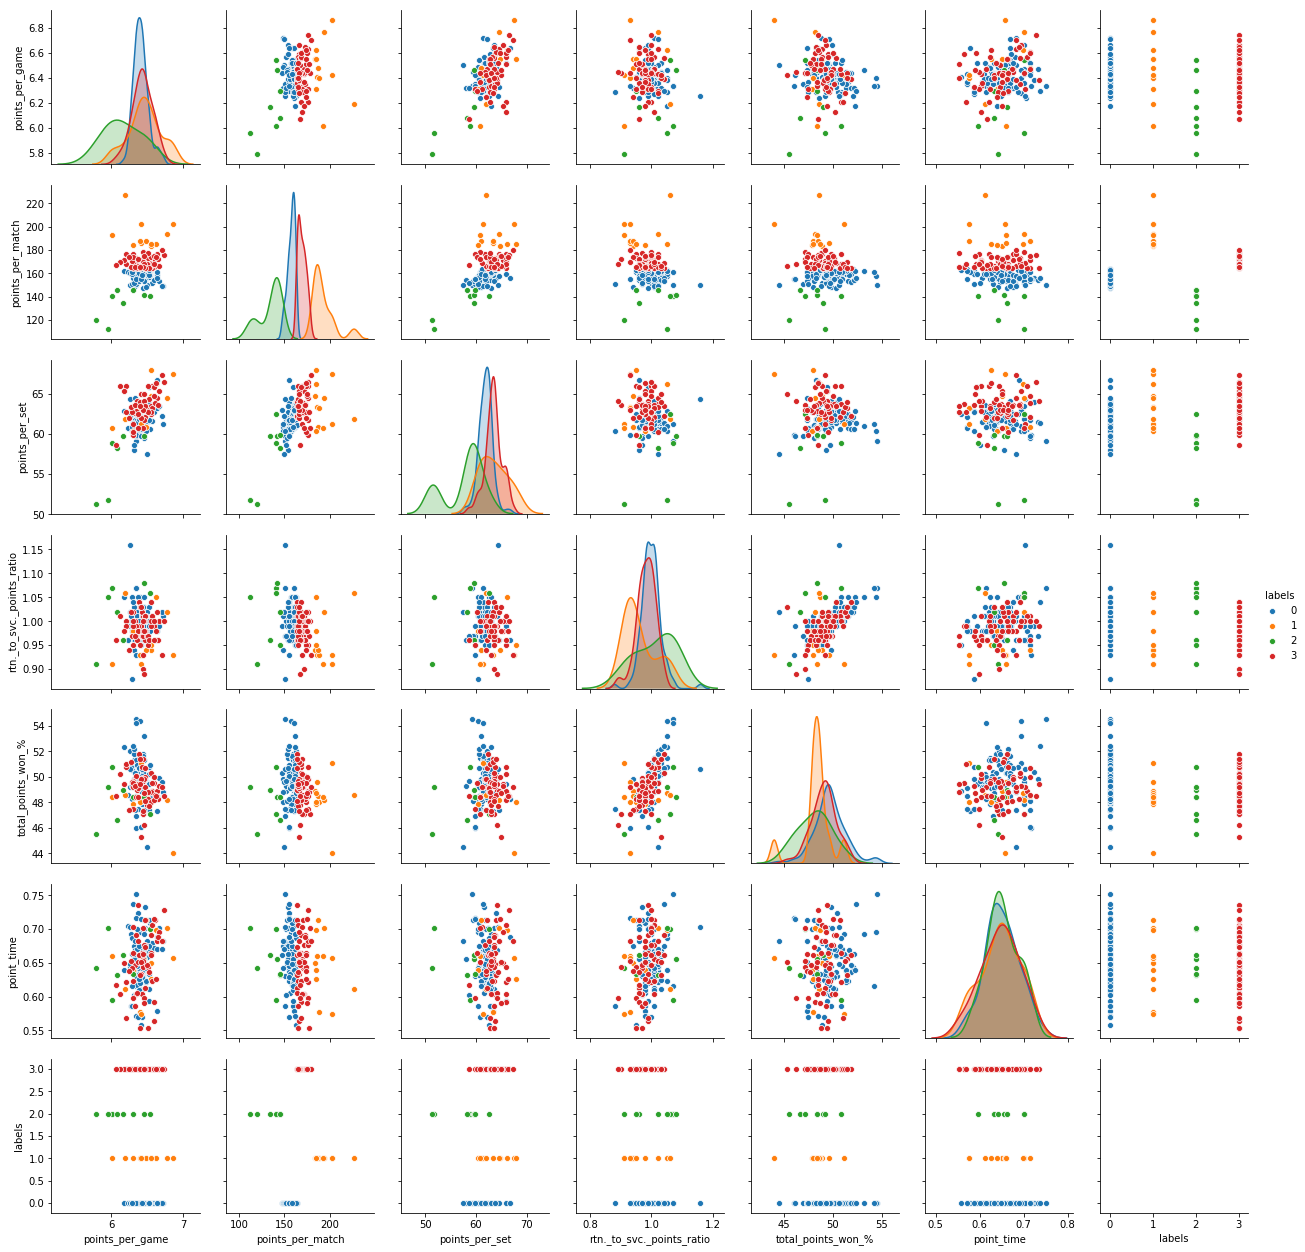

In [166]:
# Create the default pairplot
sns.pairplot(df_pontos, hue='labels')

### 